# Исследование объявлений о продаже квартир


**Цель исследования** - установить параметры, влияющие на рыночную стоимость объектов недвижимости.<br>

**Исходные данные** - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).<br>

**Вопросы, интересующие заказчика:**<br>
•	Сколько времени занимает продажа квартиры. <br>
•	Какие факторы больше всего влияют на стоимость квартиры<br>
•	Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений<br>
•	Какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Насколько они отличаются от данных по городу

**Описание данных**

•	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)<br>
•	`balcony` — число балконов<br>
•	`ceiling_height` — высота потолков (м)<br>
•	`cityCenters_nearest` — расстояние до центра города (м)<br>
•	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
•	`first_day_exposition` — дата публикации<br>
•	`floor` — этаж<br>
•	`floors_total` — всего этажей в доме<br>
•	`is_apartment` — апартаменты (булев тип)<br>
•	`kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
•	`last_price` — цена на момент снятия с публикации<br>
•	`living_area` — жилая площадь в квадратных метрах (м²)<br>
•	`locality_name` — название населённого пункта<br>
•	`open_plan` — свободная планировка (булев тип)<br>
•	`parks_around3000` — число парков в радиусе 3 км<br>
•	`parks_nearest` — расстояние до ближайшего парка (м)<br>
•	`ponds_around3000` — число водоёмов в радиусе 3 км<br>
•	`ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
•	`rooms` — число комнат<br>
•	`studio` — квартира-студия (булев тип)<br>
•	`total_area` — площадь квартиры в квадратных метрах (м²)<br>
•	`total_images` — число фотографий квартиры в объявлении<br>



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построение-гистограмм" data-toc-modified-id="Построение-гистограмм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Построение гистограмм</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Удаление-редких-и-выбивающихся-значений" data-toc-modified-id="Удаление-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление редких и выбивающихся значений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-предложения-квартир" data-toc-modified-id="Изучение-предложения-квартир-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение предложения квартир</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-сегмента-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-сегмента-квартир-в-центре-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ сегмента квартир в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#прописываем путь к датасету
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
#посмотрим общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#посмотрим на первые 10 строк
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#посмотриим на статистические характеристики датасета
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
#посмотрим на пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df.duplicated().sum()

0

### Вывод

Исходя из полученных данных можно судить, что в нашем датасете 23699 строки  и 22 столбца c данными и имеются пропуски.  Работы предстоит много... В 14 столбцах имеются пропуски - это просто ужас! Хорошо что нет дубликатов. Для выполнения нашего задания необходимо предобработать данные для столбцов: `ceiling_height`,`floors_total`,`living_area`, `floor`, `kitchen_area`, `balcony`, `locality_name`, `cityCenters_nearest`, `days_exposition`.

## Предобработка данных

Переименуем столбец, согласно "змеиного стиля"

In [8]:
df = df.rename(columns = {'cityCenters_nearest' :'city_centers_nearest'})

Удалим строки, где отсутствуют данные о локации квартир, т.к. их всего 49 и их доля состовляет 0,2% от всего датасета

In [9]:
df.dropna(subset=['locality_name'], inplace=True)

Поменяем формат даты размещения объявления о продаже квартиры и выведем на экран 5 строк столбца для проверки

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Пропуски в столбце `balcony` имеются скорее всего из-за отсутствия балкона в квартире, поэтому заполним пропуски "0", переведем в целочисленный тип и проверим замену

In [11]:
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64

Проверим столбец 'balcony' на наличие пропусков

In [12]:
df['balcony'].isna().sum()

0

Пропуски в столбцах `airports_nearest`, `parks_around3000`, `parks_nearest`,   `ponds_around3000`, `ponds_nearest` скорее всего появились из-за сбоя автоматического определения месторасположения квартиры. Данные пропуски заполнять не будем, т.к. для выполнения задания они не нужны.

Пропуски в столбцах `living_area`, `kitchen_area` `ceiling_height`, `floors_total` вероятнее всего связаны с размещением объявления не собственником квартиры, отсутствием документов, либо вообще такие объявления являются мошеническими.

Заполним пропуски в столбцах `living_area`, `kitchen_area`.

In [13]:
df['living_area'] = df['living_area'].fillna(df['living_area'].mean()/df['total_area'].mean()*df['total_area'])
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean()/df['total_area'].mean()*df['total_area'])

Проверим заполнение пропусков

In [14]:
df['living_area'].isna().sum()

0

In [15]:
df['kitchen_area'].isna().sum()

0

Заполним пропуски в столбце ceiling_height в зависимости от стоимости квартиры, ее расположения и проверим пропуски

In [16]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['last_price', 'locality_name'])
                                                   ['ceiling_height'].transform('median'))

In [17]:
df['ceiling_height'].isna().sum()

2893

Заполним оставшиеся пропуски медианным значением высоты потолков

In [18]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [19]:
df['ceiling_height'].isna().sum()

0

Заполним пропуски нулем (т.к. их всего 86 = 0,4% всего датасета).

In [20]:
df['floors_total'] = df['floors_total'].fillna(0)

In [21]:
df['floors_total'].isna().sum()

0

Проверим оставшиеся пропуски в датасете

In [22]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Значения в столбце `floors_total` переведем в целочисленный тип 

In [23]:
df['floors_total'] = round(df['floors_total']).astype('int')
df['floors_total'].dtype

dtype('int64')

Построим сводную таблицу по количеству комнат, высоте потолка, высоты дома и площадям.

In [24]:
df_area= df.pivot_table(index = 'rooms', values = ('total_area','living_area', 'kitchen_area','ceiling_height',
                                                   'floors_total'))
df_area.head(20)

,ceiling_height,floors_total,kitchen_area,living_area,total_area
rooms,,,,,
0,2.816472,16.639594,5.128234,19.581065,29.279746
1,2.672657,12.588477,9.213331,18.265330,37.627459
2,2.718299,9.883645,9.961028,31.799086,55.842278
3,2.755186,9.667414,11.488410,47.325676,77.748020
4,2.875055,7.938723,14.167191,67.104327,107.681787
5,3.094417,7.058282,19.674751,99.924896,161.474816
6,3.148714,5.990476,21.697093,130.815368,201.537619
7,3.299492,5.711864,25.565154,166.894482,265.325424
8,3.219167,5.666667,30.199428,168.683333,259.233333


Можно увидеть, что в датасете присутствуют данные о продаже от студий до 19-комнатной квартиры.

Значения в столбце `last_price` переведем в целочисленный тип 

In [25]:
df['last_price'] = df['last_price'].astype('int')
df['last_price'].dtype

dtype('int64')

Приведем к единобразию "посёлок" в "поселок"

In [26]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

Подсчитаем количество локаций о продаже квартир

In [27]:
df['locality_name'].value_counts()

Санкт-Петербург                     15721
поселок Мурино                        556
поселок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
коттеджный поселок Лесное               1
городской поселок Свирьстрой            1
садовое товарищество Новая Ропша        1
деревня Хязельки                        1
поселок Дзержинского                    1
Name: locality_name, Length: 330, dtype: int64

### Вывод

На данном шаге были заполнены пропуски в интересующих нас столбцах и преобразованны типы данных. Пропуски в столбце `days_exposition` заполнять не будем, т.к. их заполнение может исказить реальные данные.

## Расчёты и добавление результатов в таблицу

Добавим столбец со стоимостью квадратного метра

In [28]:
df['price_sq_m'] = df['last_price']/df['total_area']

Добавим столбец с обозначением дня недели размещения объявления о продаже квартиры

In [29]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday'].value_counts()

3    4286
1    4175
4    3992
2    3966
0    3606
5    1933
6    1692
Name: weekday, dtype: int64

Добавим столбец с обозначением месяца размещения объявления о продаже квартиры

In [30]:
df['month'] = df['first_day_exposition'].dt.month
df['month'].value_counts()

2     2639
3     2582
4     2373
11    2367
10    2124
9     1979
6     1755
8     1742
7     1690
12    1638
1     1491
5     1270
Name: month, dtype: int64

Добавим столбец с обозначением года размещения объявления о продаже квартиры

In [31]:
df['year'] = df['first_day_exposition'].dt.year
df['year'].value_counts()

2018    8512
2017    8185
2019    2879
2016    2765
2015    1173
2014     136
Name: year, dtype: int64

В датасете имеются данные о продаже квартир за 2014-2019 годы.

Напишем функцию для создания категорий этажей 

In [32]:
def floor_cat(row):
     if row['floor'] == 1:
        return 'первый'
     elif row ['floor'] == row['floors_total']:
        return 'последний'
     return 'другой'

Создадим столбец с категориями этажей, используя нашу функцию

In [33]:
df['floor_type'] = df.apply(floor_cat, axis=1)

Подсчитаем уникальные значения категорий этажей

In [34]:
df['floor_type'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor_type, dtype: int64

Добавим столбцы соотношений жилой и общей площади и площади кухни к общей

In [35]:
df['ratio_living_total'] = df['living_area']/df['total_area']
df['ratio_kitchen_total'] = df['kitchen_area']/df['total_area']

Посмотрим на получившуюся таблицу и статистические характеристики

In [36]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday,month,year,floor_type,ratio_living_total,ratio_kitchen_total
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.625,11,18.600000,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.640,5,34.300000,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.640,14,90.790205,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.571008,0.175146
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


In [37]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday,month,year,ratio_living_total,ratio_kitchen_total
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.00000,23650.000000,23650.000000,23650.000000,...,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.729553,10.637505,34.58242,5.893277,10.502875,0.591712,...,490.830729,0.769680,518.059879,180.753200,9.943225e+04,2.568710,6.401564,2017.370021,0.565252,0.186199
std,5.682278,1.089640e+07,35.661808,1.078620,0.993767,6.613891,22.35971,4.883317,6.037440,0.959662,...,342.554386,0.937948,277.841733,219.777916,5.033794e+04,1.788808,3.491418,1.037806,0.101082,0.069477
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.00000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.00000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.661497e+04,1.000000,3.000000,2017.000000,0.500000,0.136931
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.00000,4.000000,9.000000,0.000000,...,454.500000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.571008,0.175146
75%,14.000000,6.799000e+06,69.700000,3.000000,2.750000,16.000000,42.10000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.631579,0.223773
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.70000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


### Вывод

На данном шаге были рассчитаны и добавлены в таблицу: цена квадратного метра, день недели, год и месяц публикации объявления, категоризированые этажи квартир, соотношение жилой и общей площади, а также отношение площади кухни к общей. 

## Исследовательский анализ данных

### Построение гистограмм

Построим гистограмму столбца `total_area`. Сделаем срез данных для квартир по площади от 20 до 80 кв.м.

Text(0, 0.5, 'количество квартир')

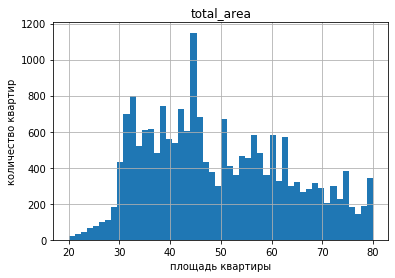

In [38]:
df['total_area'].hist(bins=50, range = (20,80))
plt.title('total_area')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')

По данной гистограмме можно сказать, что имеются несколько пиков (в диапазонах: 31-36 кв.м., 41-45 кв.м., 57-61 кв.м.). Вероятнее всего эти пики соответствуют площадям для  1-комнатных, затем  для 2-комнатных и после этого для 3-комнатных квартир.

Построим гистограмму столбца `last_price` для квартир стоимостью до 20 млн. руб.

Text(0, 0.5, 'количество квартир')

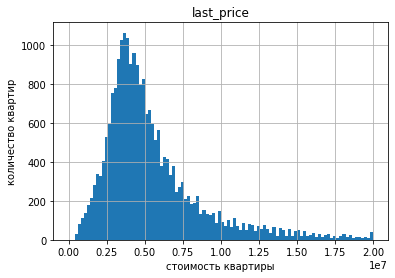

In [39]:
df['last_price'].hist(bins=100, range = (0,20000000))
plt.title('last_price')
plt.xlabel('стоимость квартиры')
plt.ylabel('количество квартир')

Гистограмма стоимости квартир похожа на распределение Пуассона.

Построим гистограмму для столбца `rooms`

Text(0, 0.5, 'количество квартир')

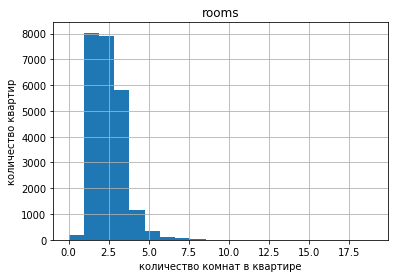

In [40]:
df['rooms'].hist(bins = 20)
plt.title('rooms')
plt.xlabel('количество комнат в квартире')
plt.ylabel('количество квартир')

По данной гистограмме видно, что больше всего данных предоставлено о 1, 2 и 3-х комнатных квартирах, как было замечено в выводе к гистограмме столбца `total_area`

Построим гистограмму по столбцу `ceiling_height`

Text(0, 0.5, 'количество квартир')

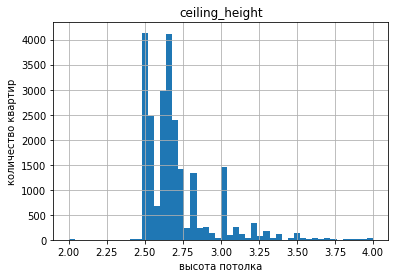

In [41]:
df['ceiling_height'].hist(bins=50, range = (2,4))
plt.title('ceiling_height')
plt.xlabel('высота потолка')
plt.ylabel('количество квартир')

Данная гистограмма далека от нормального распределения, требуется очистка данных от редких и выбивающихся значений.

### Изучение времени продажи квартиры 

In [42]:
#Посмотрим имеющиеся данные 
df['days_exposition'].describe() 

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Подсчитывать среднее и медианное время продажи квартиры нецелесообразно, т.к. эти данные видно при вызове метода describe: среднее время продажи квартиры = 181 день, а медианное = 95 дней.

Построение гистограммы

Text(0, 0.5, 'количество квартир')

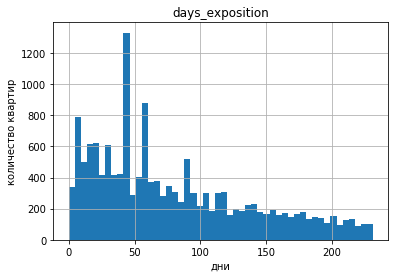

In [43]:
df['days_exposition'].hist(bins=50, range=(0,231))#Возьмем срез до 3 квартиля
plt.title('days_exposition')
plt.xlabel('дни')
plt.ylabel('количество квартир')

Заполним пропуски выбивающимся маркером и преобразуем тип данных

In [44]:
df['days_exposition'] = df['days_exposition'].fillna(9000).astype('int')

#### Вывод

Среднее время продажи составляет 181 день, а медианное время продажи составляет 95 дней. Обычно продажа квартиры занимает менее 100 дней. Очень быстрой продажей квартиры можно считать срок менее 45 дней, а необычно долгой свыше 231 дня.

### Удаление редких и выбивающихся значений

Построим диаграммы размаха для столбцов датасета.

Посмотрим "ящики с усами" для столбцов `total_area`, `kitchen_area`, `living_area`

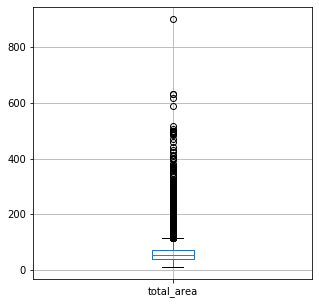

In [45]:
df.boxplot('total_area', figsize =(5, 5))
plt.show()

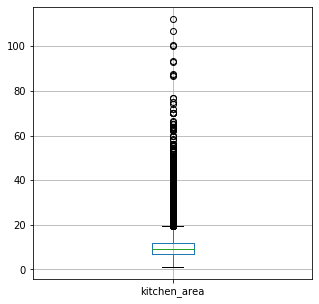

In [46]:
df.boxplot('kitchen_area', figsize =(5, 5))
plt.show()

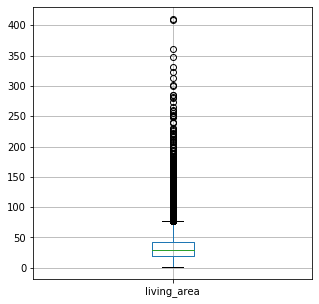

In [47]:
df.boxplot('living_area', figsize =(5, 5))
plt.show()

Посмотрим на "ящик с усами" для столбца `last_price`

(0, 20000000)

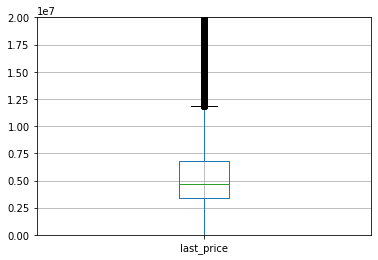

In [48]:
df.boxplot('last_price')
plt.ylim(0,20000000)

Посмотрим на "ящик с усами" для столбца `rooms`

(0, 19)

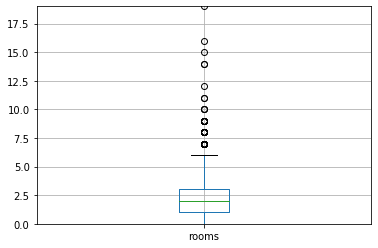

In [49]:
df.boxplot('rooms')
plt.ylim(0,19)

Посмотрим на "ящик с усами" для столбца `ceiling_height`

(0, 7)

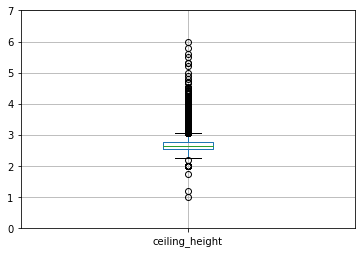

In [50]:
df.boxplot('ceiling_height')
plt.ylim(0,7)

Во всех рассмотренных столбцах имеются редкие и выбивающиеся значения. Применим стандартную функцию для очистки данных в 1,5 межквартильного размаха в каждую сторону.

Стандартная функция очищения исходного датафрейма от выбросов и возврата очищенных данных в датасет

In [51]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high),col_name]
    return df_out

Создадим список столбцов, в которых необходимо очистить данные и применим к ним функцию

In [52]:
list = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 
                 'ceiling_height', 'rooms']
for col in list:
    df[col] = remove_outlier(df, col)

Посмотрим на очищенные данные

In [53]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday,month,year,ratio_living_total,ratio_kitchen_total
count,23650.000000,2.159500e+04,22406.000000,23455.000000,21972.000000,23650.000000,22764.000000,23650.000000,22329.000000,23650.000000,...,8064.000000,18140.000000,9085.000000,20070.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,4.838942e+06,54.325685,2.029631,2.653425,10.637505,31.520641,5.893277,9.420630,0.591712,...,490.830729,0.769680,518.059879,162.392427,9.943225e+04,2.568710,6.401564,2017.370021,0.565252,0.186199
std,5.682278,2.217282e+06,19.349559,0.973653,0.138129,6.613891,13.755649,4.883317,3.181018,0.959662,...,342.554386,0.937948,277.841733,177.658640,5.033794e+04,1.788808,3.491418,1.037806,0.101082,0.069477
min,0.000000,1.219000e+04,12.000000,0.000000,2.250000,0.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.300000e+06,39.400000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,44.000000,7.661497e+04,1.000000,3.000000,2017.000000,0.500000,0.136931
50%,9.000000,4.400000e+06,50.100000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,...,454.500000,1.000000,502.000000,92.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.571008,0.175146
75%,14.000000,6.000000e+06,65.500000,3.000000,2.700000,16.000000,40.592160,8.000000,11.000000,1.000000,...,612.000000,1.000000,730.000000,217.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.631579,0.223773
max,50.000000,1.189440e+07,114.200000,5.000000,3.050000,60.000000,76.700000,33.000000,19.450000,5.000000,...,3190.000000,3.000000,1344.000000,907.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


#### Вывод

Из датасета исключены выбивающиеся значения. Потери составили не более 5 % от исходного датасета.

### Факторы, влияющие на стоимость квартиры

Построим матрицу корреляции для интересующих нас столбцов

In [54]:
df[['price_sq_m', 'rooms', 'last_price','city_centers_nearest', 'total_area']].corr()

,price_sq_m,rooms,last_price,city_centers_nearest,total_area
price_sq_m,1.000000,0.022592,0.608575,-0.318099,0.117411
rooms,0.022592,1.000000,0.448927,-0.160918,0.788941
last_price,0.608575,0.448927,1.000000,-0.345444,0.693900
city_centers_nearest,-0.318099,-0.160918,-0.345444,1.000000,-0.182557
total_area,0.117411,0.788941,0.693900,-0.182557,1.000000


Из матрицы видно, что есть сильная зависимость между ценой квартиры и общей площадью, и стоимостью квадратного метра. 
Средняя стоимость квартиры растет пропорционально количеству комнат. Зависимость цены квартиры относительно расположения от центра города имеет отрицательный коэффициент корреляции, значит чем дальше от центра, тем дешевле квартира с аналогичными параметрами. 

Построим график зависимости средней стоимости квартиры от категории этажа

Text(0, 0.5, 'средняя стоимость квартиры')

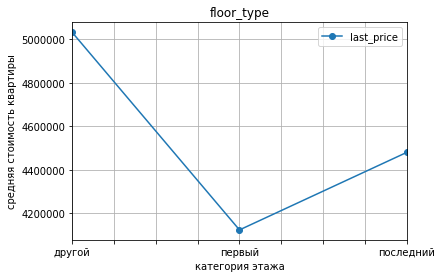

In [55]:
df.pivot_table(index = 'floor_type', values = 'last_price').plot(grid = True, style = 'o-')
plt.title('floor_type')
plt.xlabel('категория этажа')
plt.ylabel('средняя стоимость квартиры')

Квартиры на первом этаже самые дешевые. Средняя стоимость квартир на последнем этаже дороже, чем на первом, но дешевле остальных этажей.

Построим матрицу корреляции для "временных" столбцов

In [56]:
df[['weekday', 'month', 'last_price','year']].corr()

,weekday,month,last_price,year
weekday,1.000000,0.011354,-0.014317,-0.003844
month,0.011354,1.000000,0.005493,-0.271176
last_price,-0.014317,0.005493,1.000000,-0.001975
year,-0.003844,-0.271176,-0.001975,1.000000


Явной зависимости не видно, построим отдельные графики для каждого столбца: `weekday`, `month`,`year`

Text(0, 0.5, 'средняя стоимость квартиры')

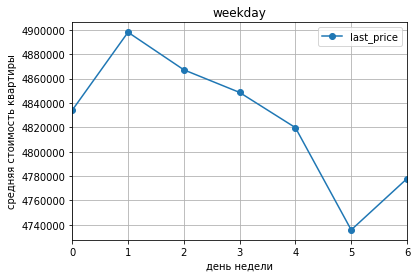

In [57]:
df.pivot_table(index = 'weekday', values = 'last_price').plot(grid = True, style = 'o-')
plt.title('weekday')
plt.xlabel('день недели')
plt.ylabel('средняя стоимость квартиры')

На графике видно, что по самые дорогие квартиры выставлены на продажу во вторник, а самые дешевые - в субботу.

Text(0, 0.5, 'средняя стоимость квартиры')

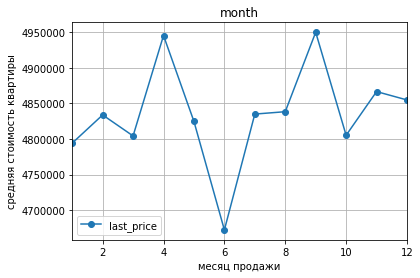

In [58]:
df.pivot_table(index = 'month', values = 'last_price').plot(grid = True, style = 'o-')
plt.title('month')
plt.xlabel('месяц продажи')
plt.ylabel('средняя стоимость квартиры')

Самая высокая средняя цена на квартиры выставляется в апреле и сентябре, а в июне продавцы вынуждены скидывать цены для продажи квартиры.

Text(0, 0.5, 'средняя стоимость квартиры')

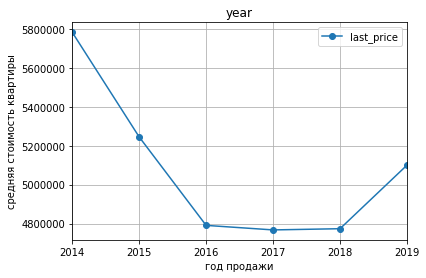

In [59]:
df.pivot_table(index = 'year', values = 'last_price').plot(grid = True, style = 'o-')
plt.title('year')
plt.xlabel('год продажи')
plt.ylabel('средняя стоимость квартиры')

Средняя стоимость квартир в 2014 году была на пике, а далее последовал резкий спад. В 2016-2018 годах цены стабилизировались на низком уровне, а с 2018 года цена начала повышаться.

Найдем топ-10 населенных пунктов с наибольшим числом объявлений

In [60]:
top_locality = df['locality_name'].value_counts().head(10)
top_locality

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Самое большое число квартир в продаже находится в Санкт-Петербурге.

Подстичаем стоимость квадратного метра в топ-10 населенных пунктов

In [61]:
top_locality_price = (df.query('locality_name in (@top_locality.index)')
                      .pivot_table(values='price_sq_m', index='locality_name'))

Переведем данные в целочисленный вид

In [62]:
top_locality_price = top_locality_price.astype(int)

Отсортируем топ-10 населенных пунктов по убыванию стоимости квадратного метра

In [63]:
top_locality_price.sort_values('price_sq_m', ascending=False)

,price_sq_m
locality_name,
Санкт-Петербург,114849
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85681
поселок Шушары,78677
Колпино,75424
Гатчина,68746
Всеволожск,68654


#### Вывод

Средняя стоимость квартиры зависит от многих факторов:от площади квартиры, количества комнат, этажа, удаленности от  центра города. Самый дорогой квадратный метр конечно же находится в Санкт-Петербурге. Самая низкая стоимость жилья в топ-10 находится в Выборге - небольшом городе, далеком от Санкт-Петербурга.

### Изучение предложения квартир

Создадим столбец с расстоянием до центра в километрах

In [64]:
df['city_centers_km'] = df['city_centers_nearest']/1000
df['city_centers_km'] = df['city_centers_km'].fillna(value = 0).astype(int)
df['city_centers_km'].head()

0    16
1    18
2    13
3     6
4     8
Name: city_centers_km, dtype: int64

Построим график изменения цены квартиры от удаленности от центра города в километрах

Text(0, 0.5, 'стоимость квартиры')

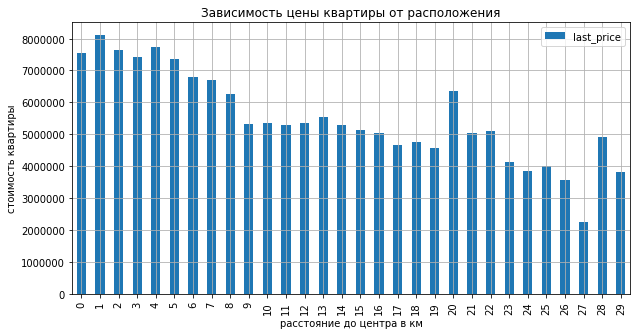

In [65]:
(df.query('locality_name =="Санкт-Петербург"')
 .pivot_table(index = 'city_centers_km', values = 'last_price')
 .plot(grid = True, kind = 'bar',figsize = (10, 5)))
plt.title('Зависимость цены квартиры от расположения')
plt.xlabel('расстояние до центра в км')
plt.ylabel('стоимость квартиры')

На графике видна резкая граница изменения цены квартиры от удаленности от центра - 8 км. Будем считать это значение условной границей центра Санкт-Петербурга.

#### Вывод

На данном этапе была определена центральная зона Санкт-Петербурга составляющая 8 км.

### Анализ сегмента квартир в центре Санкт-Петербурга

Создадим датасет со строками, соответствующими центральной зоне Санкт-Петербурга

In [66]:
spb_center = df.query('(locality_name == "Санкт-Петербург") & (city_centers_km <= 8)')

Посмотрим на информацию о числовых столбцах нового датасета

In [67]:
spb_center[['last_price', 'price_sq_m', 'total_area', 'rooms', 'ceiling_height', 'floor',
            'city_centers_km', 'days_exposition']].describe()

,last_price,price_sq_m,total_area,rooms,ceiling_height,floor,city_centers_km,days_exposition
count,3.031000e+03,4.443000e+03,3557.000000,4276.000000,3123.000000,4443.000000,4443.000000,3556.000000
mean,7.173743e+06,1.409740e+05,67.288100,2.549813,2.772555,4.503038,4.711681,201.730877
std,2.254286e+06,8.616514e+04,22.575894,1.099111,0.170903,3.307269,2.176771,205.741008
min,1.600000e+06,1.534527e+04,12.000000,0.000000,2.400000,1.000000,0.000000,3.000000
25%,5.492500e+06,9.961179e+04,48.000000,2.000000,2.640000,2.000000,3.000000,54.000000
50%,7.000000e+06,1.222494e+05,66.000000,3.000000,2.750000,4.000000,5.000000,119.000000
75%,8.900000e+06,1.523947e+05,84.600000,3.000000,3.000000,5.000000,6.000000,292.000000
max,1.189440e+07,1.907500e+06,114.200000,5.000000,3.050000,25.000000,8.000000,907.000000


Построим гистограммы для интересующих нас параметров центральной зоны Санкт-Петербурга

Text(0, 0.5, 'количество квартир')

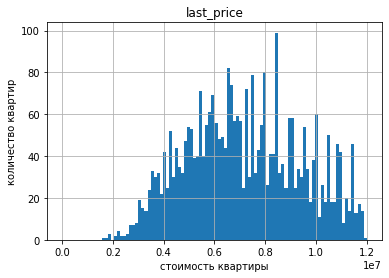

In [68]:
spb_center['last_price'].hist(bins=100, range = (0,12000000))
plt.title('last_price')
plt.xlabel('стоимость квартиры')
plt.ylabel('количество квартир')

Text(0, 0.5, 'количество квартир')

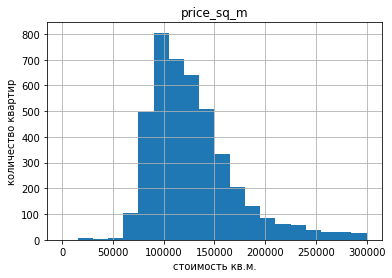

In [69]:
spb_center['price_sq_m'].hist(bins=20, range = (0,300000))
plt.title('price_sq_m')
plt.xlabel('стоимость кв.м.')
plt.ylabel('количество квартир')

Text(0, 0.5, 'количество квартир')

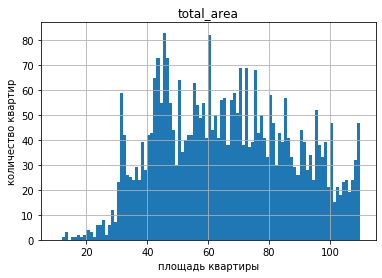

In [70]:
spb_center['total_area'].hist(bins=100, range = (10,110))
plt.title('total_area')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')

Text(0, 0.5, 'количество квартир')

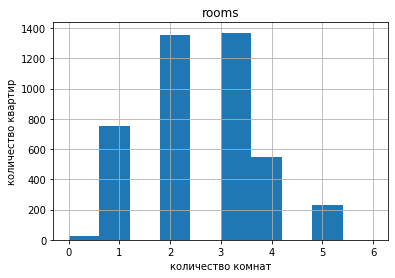

In [71]:
spb_center['rooms'].hist(range = (0,6))
plt.title('rooms')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')

Text(0, 0.5, 'количество квартир')

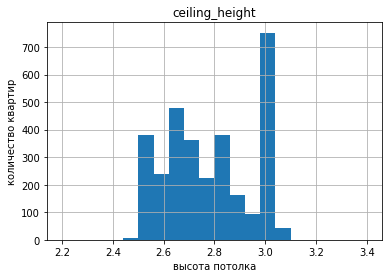

In [72]:
spb_center['ceiling_height'].hist(bins = 20, range = (2.2, 3.4))
plt.title('ceiling_height')
plt.xlabel('высота потолка')
plt.ylabel('количество квартир')

Text(0, 0.5, 'количество квартир')

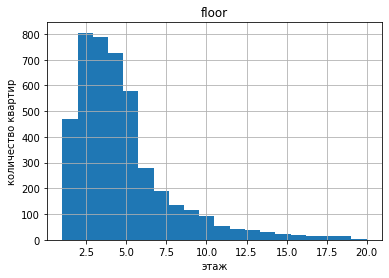

In [73]:
spb_center['floor'].hist(bins=20, range = (1,20))
plt.title('floor')
plt.xlabel('этаж')
plt.ylabel('количество квартир')

Text(0, 0.5, 'количество квартир')

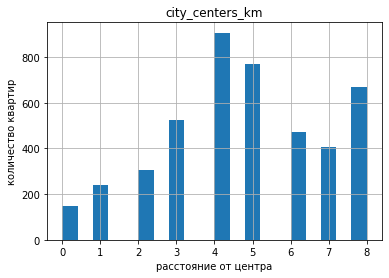

In [74]:
spb_center['city_centers_km'].hist(bins = 20, range = (0,8))
plt.title('city_centers_km')
plt.xlabel('расстояние от центра')
plt.ylabel('количество квартир')

Text(0, 0.5, 'количество квартир')

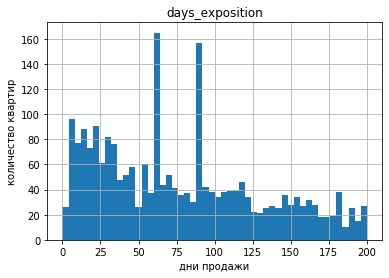

In [75]:
spb_center['days_exposition'].hist(bins=50, range = (0,200))
plt.title('days_exposition')
plt.xlabel('дни продажи')
plt.ylabel('количество квартир')

Text(0, 0.5, 'стоимость кв.м.')

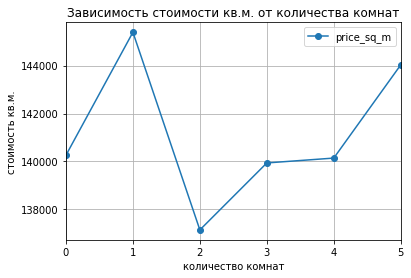

In [76]:
spb_center.pivot_table(index = 'rooms', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

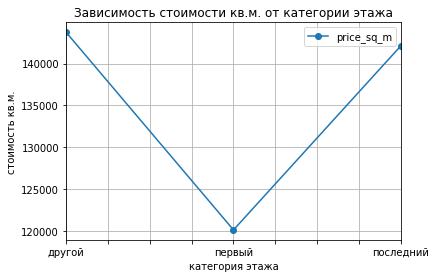

In [77]:
spb_center.pivot_table(index = 'floor_type', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от категории этажа')
plt.xlabel('категория этажа')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

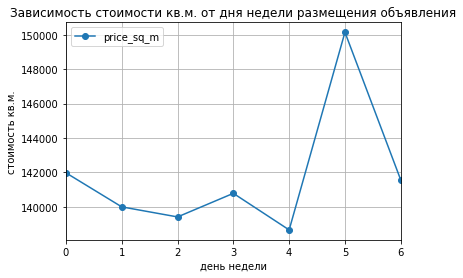

In [78]:
spb_center.pivot_table(index = 'weekday', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от дня недели размещения объявления')
plt.xlabel('день недели')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

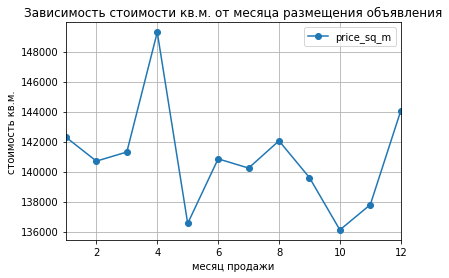

In [79]:
spb_center.pivot_table(index = 'month', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от месяца размещения объявления')
plt.xlabel('месяц продажи')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

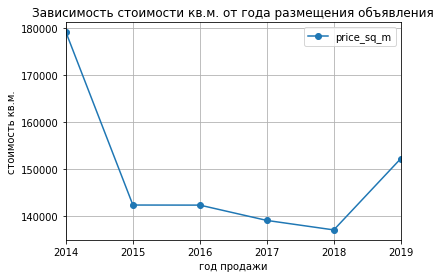

In [80]:
spb_center.pivot_table(index = 'year', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от года размещения объявления')
plt.xlabel('год продажи')
plt.ylabel('стоимость кв.м.')

Опишем наши наблюдения:<br>1. Средняя и медианная площади квартир почти совпадают и составляют 67 и 66 кв.м соответственно. Минимальная площадь - 12 кв.м. Максимальная площадь - 114 кв.м.<br> 2. Средняя и медианная стоимости квартир почти совпадают. Медианная стоимость - 7 млн. руб. Средняя стоимость - 7,17 млн. руб. Минимальная стоимость - 1,6 млн. руб. Максимальная стоимость - 11,9 млн. руб.<br> 3. Медианное количество комнат - 3. Максимально количество комнат - 5. В центре города преобладают двух и трех комнатные квартиры и их количество примерно одинаково.<br> 4. Средняя и медианная высота потолков почти совпадают и составляют 2,77 и 2,75 метра соответственно. Большое количество квартир в центре имеют высоту потолков 3 метра. Но в центре также существуют квартиры с высотой потолков 2,4 м.<br> 5. В центре преобладает малоэтажная историческая застройка (медианное значение - 4 этажа), но в центр начал пробиваться новострой с 25 этажами (максимум).<br> 6. Средняя удаленность от центра города составляет 4,7 км. Большинство квартир находится на расстоянии 4-5 км от центра.<br> 7. Минимальный срок продажи квартиры составляет - 3 дня. Медианное значение - 119 дней, среднее - 201 день, максимальное - 907 дней (больше 2 лет).<br> 8.Медианное значение стоимости квадратного метра - 122 тыс.руб, среднее - 141тыс.руб.  <br>  9. Самые дорогие квартиры (по стоимости кв.м.)выставляются на продажу в субботу. Максимальная стоимость кв.м. в апреле, а в мае и октябре имеются провалы. Снижение стоимости кв.м. наблюдается  с 2014 по 2018 года, резкий спад произошел в 2014 году во время кризиса на 27% (со 180 до 142 тыс. руб/кв.м.), а с 2018 года начался рост.<br> 10. Стоимость кв.м. для студий и 3, 4-х комнатных квартир примерно одинакова, для 1-х комнатных квартир - самая высокая стоимость кв.м., а в 5-комнатных квартирах чуть ниже, чем в 1-комнатных.

Для проведения сравнения создадим датасет для всего Санкт-Петербурга

In [81]:
spb = df.query('(locality_name == "Санкт-Петербург")')
spb[['last_price', 'price_sq_m', 'total_area', 'rooms', 
     'ceiling_height', 'floor','city_centers_km', 'days_exposition']].describe()

,last_price,price_sq_m,total_area,rooms,ceiling_height,floor,city_centers_km,days_exposition
count,1.373700e+04,1.572100e+04,14574.000000,15535.000000,14201.000000,15721.000000,15721.00000,13345.000000
mean,5.663713e+06,1.148490e+05,56.499167,2.114258,2.668275,6.242033,11.06081,162.540877
std,2.094665e+06,5.258452e+04,20.349577,1.008149,0.149202,4.900486,4.88160,178.971312
min,1.219000e+04,1.118349e+02,12.000000,0.000000,2.300000,1.000000,0.00000,1.000000
25%,4.075000e+06,9.090909e+04,41.000000,1.000000,2.550000,3.000000,8.00000,41.000000
50%,5.150000e+06,1.047619e+05,52.000000,2.000000,2.640000,5.000000,12.00000,92.000000
75%,6.850000e+06,1.244389e+05,69.000000,3.000000,2.750000,8.000000,14.00000,216.000000
max,1.189440e+07,1.907500e+06,114.200000,5.000000,3.050000,33.000000,29.00000,907.000000


Построим гистограмму по столбцу `last_price` для всего города Санкт-Петербург методом наложения на гистограмму центральной зоны.

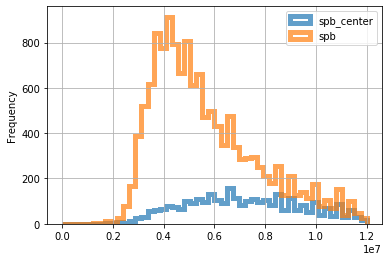

In [82]:
ax = spb_center.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    range=(0, 12000000),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='spb_center',
)
spb.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    range=(0, 12000000),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
) 


Построим гистограмму по столбцу `price_sq_m` для всего города Санкт-Петербург методом наложения на гистограмму центральной зоны.

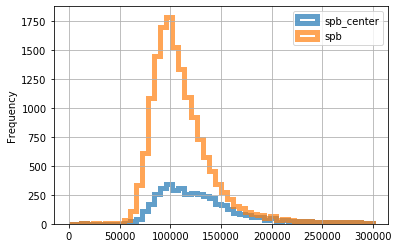

In [83]:
ax = spb_center.plot(
    kind='hist',
    y='price_sq_m',
    histtype='step',
    range=(0, 300000),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='spb_center',
)
spb.plot(
    kind='hist',
    y='price_sq_m',
    histtype='step',
    range=(0, 300000),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
) 

Построим гистограмму по столбцу `total_area` для всего города Санкт-Петербург методом наложения на гистограмму центральной зоны.

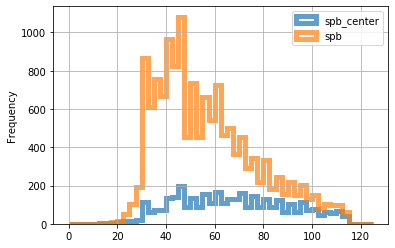

In [84]:
ax = spb_center.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 125),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='spb_center',
)
spb.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 125),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
) 

Построим гистограмму по столбцу `ceiling_height` для всего города Санкт-Петербург методом наложения на гистограмму центральной зоны.

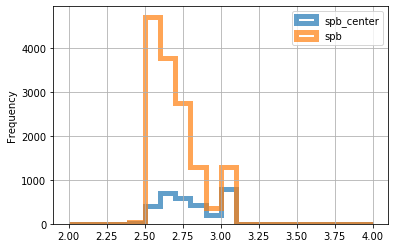

In [85]:
ax = spb_center.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(2, 4),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='spb_center',
)
spb.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(2, 4),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
) 

Построим гистограмму по столбцу `floor` для всего города Санкт-Петербург методом наложения на гистограмму центральной зоны.

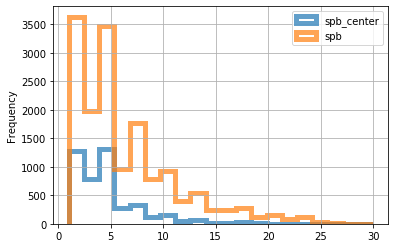

In [86]:
ax = spb_center.plot(
    kind='hist',
    y='floor',
    histtype='step',
    range=(1, 30),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='spb_center',
)
spb.plot(
    kind='hist',
    y='floor',
    histtype='step',
    range=(1, 30),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
) 

Построим гистограмму по столбцу `days_exposition` для всего города Санкт-Петербург методом наложения на гистограмму центральной зоны.

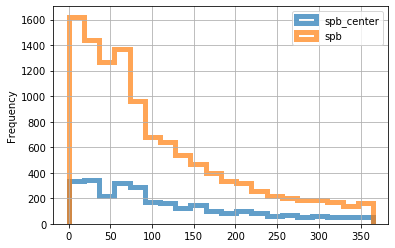

In [87]:
ax = spb_center.plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    range=(0, 365),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='spb_center',
)
spb.plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    range=(0, 365),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
) 

Построим графики

Text(0, 0.5, 'стоимость кв.м.')

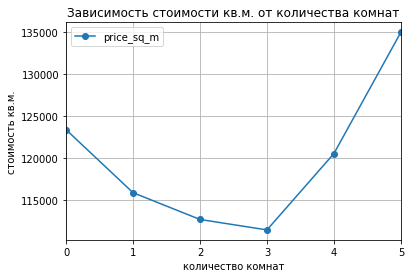

In [88]:
spb.pivot_table(index = 'rooms', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

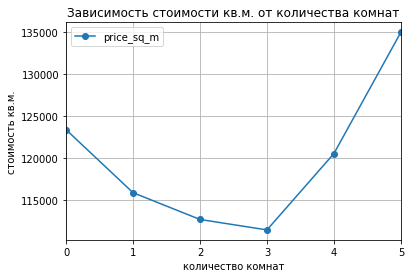

In [89]:
spb.pivot_table(index = 'rooms', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

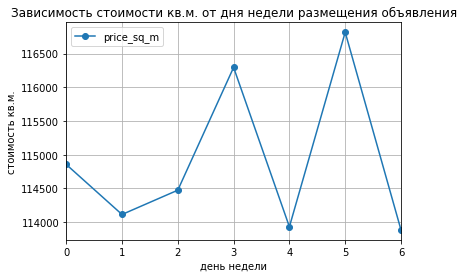

In [90]:
spb.pivot_table(index = 'weekday', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от дня недели размещения объявления')
plt.xlabel('день недели')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

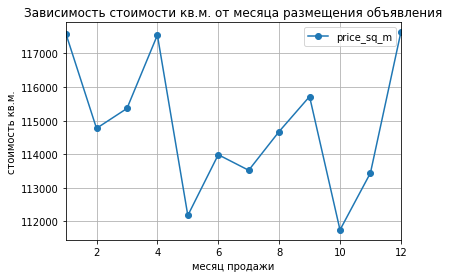

In [91]:
spb.pivot_table(index = 'month', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от месяца размещения объявления')
plt.xlabel('месяц продажи')
plt.ylabel('стоимость кв.м.')

Text(0, 0.5, 'стоимость кв.м.')

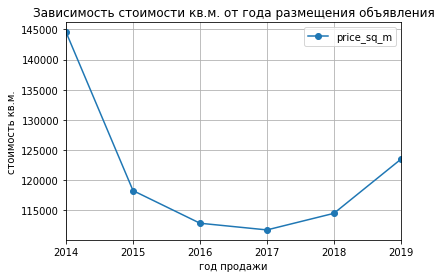

In [92]:
spb.pivot_table(index = 'year', values = 'price_sq_m').plot(grid = True, style = 'o-')
plt.title('Зависимость стоимости кв.м. от года размещения объявления')
plt.xlabel('год продажи')
plt.ylabel('стоимость кв.м.')

Сравним параметры: <br> 1. Средняя и медианная площади квартир составляют 56.5 и 52 кв.м. соответственно, что на 10-15 кв.м. меньше, чем в центре города.<br> 2.Медианная стоимость квартиры - 5.15 млн. руб. Средняя стоимость - 5.66 млн. руб., что на 1,5-2 млн. руб. дешевле, чем в центре.<br> 3. Медианное количество комнат - 2, что на одну комнату меньше, чем в центре. <br> 4. Средняя и медианная высота потолков почти совпадают и составляют 2,66 и 2,64 метра соответственно. В среднем потолки ниже на 10 см, чем в центре. Но подавляющее большинство квартир с высотой потолков 2,5 метра.<br> 5. Медианное высота домов - 5 этажей. Максимальная высота домов - 33 этажа. С удаленностью от центра и возрастает этажность застройки.<br> 6. Средняя удаленность от центра города составляет 11,1 км.<br> 7. Минимальный срок продажи квартиры составляет - 1 день. Медианное значение - 92 дня, среднее - 163 дня. Квартиры в центре Санкт-Петербурга продаются дольше.<br> 8.Медианное значение стоимости квадратного метра - 105 тыс.руб, среднее - 115 тыс.руб., что на 17 - 26 тыс.руб/кв.м. меньше, чем в центре.<br>  9. Самые дорогие квартиры (по стоимости кв.м.)выставляются на продажу в субботу и в четверг. Максимальная стоимость кв.м. в январе, апреле, декабре, а в мае и октябре имеются провалы. Снижение стоимости кв.м. наблюдается  с 2014 по 2017 года, резкий спад произошел в 2014 году во время кризиса на 23% (с 145 до 118 тыс. руб/кв.м.), а с 2017 года начался рост.<br> 10. Имеется снижение стоимости кв.м. от студий до 3-х комнатных квартир, а с 4-х комнатных квартир идет рост стоимости  кв.м.

## Общий вывод

В процессе выполнения данного проекта была проделана большая работа:<br>1. Проанализированы, удалены, заполнены пропуски данных, изменены типы данных, добавлены необходимые столбцы и изучены основные параметры недвижимости.<br> 2. С помощью функции исключены редкие и выбивающиеся значения. <br> 3. Изучены факторы, влияющие на стоимость квартиры и их взаимозависимости.<br> 4. Выделена центральная зона Санкт-Петербурга и проведен анализ стоимости квартиры в зависимости от удаленности от центра города.<br> 5. Проведено сравнение основных факторов для недвижимости в центральной зоне относительно всего Санкт-Петербурга.<br>
**Срок продажи квартиры**<br>
•	Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго. <br>
•	Есть большое число квартир, проданных всего за несколько дней после публикации.<br>
•	Также есть варианты, которые продавались несколько десятков месяцев.<br>
**Факторы, влияющие на стоимость**<br>
•	На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.<br>
•	Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.<br>
**Стоимость квадратного метра в топ-10 населённых пунктов**<br>
•	Дороже всего квадратный метр в Санкт-Петербурге<br>
•	Дешевле всего квадратный метр в Выборге<br>
**Факторы, влияющие на стоимость в центре Санкт-Петербурга**<br>
•	В центре города практически нет разницы, насколько квартира удалена от условного центра города.<br>
•	Экономическая ситуация в стране мало влияет на элитную недвижимость в центре, но во время кризиса произошел резкий спад стоимости квадратного метра.<br>
•	В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.<br>
•	В центре есть очень дорогие однокомнатные квартиры (по стоимости кв.м.).
